## SAR data used

### Earthquakes Involved

+ 2023-02-06 01:17:34 (UTC) M 7.8 earthquake ([USGS](https://earthquake.usgs.gov/earthquakes/eventpage/us6000jllz/executive))
+ 2023-02-06 10:24:48 (UTC) M 7.5 earthquake ([USGS](https://earthquake.usgs.gov/earthquakes/eventpage/us6000jlqa/executive))
+ 2023-02-20 17:04:29 (UTC) M 6.3 earthquake ([USGS](https://earthquake.usgs.gov/earthquakes/eventpage/us6000jqcn/executive))

### ALOS-2

+ Analysis by GSI: https://www.gsi.go.jp/cais/topic20230206-e_Turkey.html
+ Data Info from JAXA: https://www.eorc.jaxa.jp/ALOS/en/dataset/alos_open_and_free_e.htm
+ Data Search and Download: https://gportal.jaxa.jp/gpr/
+ ARIA from JPL-Caltech: https://aria-share.jpl.nasa.gov/20230206_Turkey_EQ/Displacements/ALOS2

### Sentinel-1

+ ARIA Interferograms:
  - https://grfn.asf.alaska.edu/door/download/S1-GUNW-D-R-021-tops-20230210_20230129-033440-00036E_00037N-PP-c92c-v2_0_6.nc
  - https://grfn.asf.alaska.edu/door/download/S1-GUNW-D-R-021-tops-20230210_20230129-033504-00035E_00035N-PP-8473-v2_0_6.nc
  - https://grfn.asf.alaska.edu/door/download/S1-GUNW-A-R-014-tops-20230209_20230116-153436-00034E_00037N-PP-3d4c-v2_0_6.nc
  - https://grfn.asf.alaska.edu/door/download/S1-GUNW-A-R-014-tops-20230209_20230116-153411-00035E_00035N-PP-fd4d-v2_0_6.nc

In [1]:
%matplotlib inline
import os
import glob
import datetime as dt
from matplotlib import pyplot as plt
from mintpy.cli import view
plt.rcParams.update({'font.size': 12})

fnames = [
    'ALOS2_A184_20220905_20230220_IFG/geo*.unw',
    'ALOS2_A184_20220905_20230220_MAI/mai*.geo',
    'ALOS2_D077_20220916_20230217_IFG/geo*.unw',
    'ALOS2_D077_20220916_20230217_MAI/mai*.geo',
    'LT1_D068_20220411_20230210_IFG/geo*.unw',
    'S1_A014_20230128_20230209_OFF_AZ/offAz.geo',
    'S1_A014_20230128_20230209_OFF_RG/offRg_ERA5_SET.geo',
    'S1_A116_20230204_20230228_OFF_AZ/offAz.geo',
    'S1_A116_20230204_20230228_OFF_RG/offRg_ERA5_SET.geo',
    'S1_D021_20230129_20230210_OFF_AZ/offAz.geo',
    'S1_D021_20230129_20230210_OFF_RG/offRg_ERA5_SET.geo',
]

proj_dir = os.path.expanduser('~/data/archives/2023TurkeyEQ')
work_dir = os.path.join(proj_dir, 'data')
os.chdir(work_dir)
print('Go to directory:', work_dir)

dem_file = os.path.join(proj_dir, 'DEM/demLat_N35_N42_Lon_E034_E041_90m.h5')
flt_file = os.path.join(proj_dir, 'USGS/simple_fault_confident.lonlat')

Go to directory: /Users/yunjunz/data/archives/2023TurkeyEQ/data


### Summary

In [2]:
data_list = [
    #   sensor      mode        pass  track  frame         date1         date2         time
    # Dense fringes in the near field + snow cover --> difficult to unwrap (no unw file from ARIA too), thus, use dense offsets instead.
    # S1_A116: data acquired at 20230216 miss one frame in ESA/ASF, thus 20230228 is used instead.
    ['Sentinel-1', 'TOPS'    , 'ASC', '014', None,        '2023-01-28', '2023-02-09', '15:34'],
    ['Sentinel-1', 'TOPS'    , 'ASC', '116', None,        '2023-02-04', '2023-02-28', '15:26'],
    ['Sentinel-1', 'TOPS'    , 'DSC', '021', None,        '2023-01-29', '2023-02-10', '03:34'],

    # ALOS-2, successfully unwrap after careful masking
    # ALOS-2 local solar time: 23:40 for asc (weak iono), 11:46 for desc (strong iono)
    ['ALOS-2'    , 'ScanSAR' , 'ASC', '184', '0700_0750', '2022-09-05', '2023-02-20', '21:28'],
    ['ALOS-2'    , 'ScanSAR' , 'DSC', '077', '2850_2900', '2022-09-16', '2023-02-17', '09:33'],

    # LT1_D000_20220411_20230210:
    ['LuTan-1'   , 'Stripmap', 'DSC', '068', None,        '2022-04-11', '2023-02-10', '03:34'],

    ## Bad
    # [WIP] ALOS2_D078_20220406_20230208: not freely available from JAXA; use ARIA products directly
    # To-do: find out what corrections have been applied to ARIA
    ['ALOS-2'    , 'Stripmap', 'DSC', '078', '2830_2880', '2022-04-06', '2023-02-08', '09:40'],
    # [WIP] ALOS2_A183_20190918_20230215: low coherence due to long temporal baseline -> difficult to unwrap
    # To-do: try offset instead, need to mosaic the ALOS-2 ScanSAR [change isce2 code; low priority]
    ['ALOS-2'    , 'ScanSAR' , 'ASC', '183', '0750',      '2019-09-18', '2023-02-15', '21:21'],
]

### Plot

--------------------------------------------------1/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce .unw file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/ALOS2_A184_20220905_20230220_IFG/geo_filt_msk_ERA5_SET.unw in float32 format
file size in y/x: (4440, 5400)
input dataset: "['phase']"
num of datasets in file geo_filt_msk_ERA5_SET.unw: 2
datasets to exclude (0):
[]
datasets to display (1):
['phase']
data   coverage in y/x: (0, 0, 5400, 4440)
subset coverage in y/x: (0, 0, 5400, 4440)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: ALOS2_A184_20220905_20230220_IFG
figure size : [9.12, 6.00]
reading data ...
Apply math operation: reverse
data    range: [-3.6157

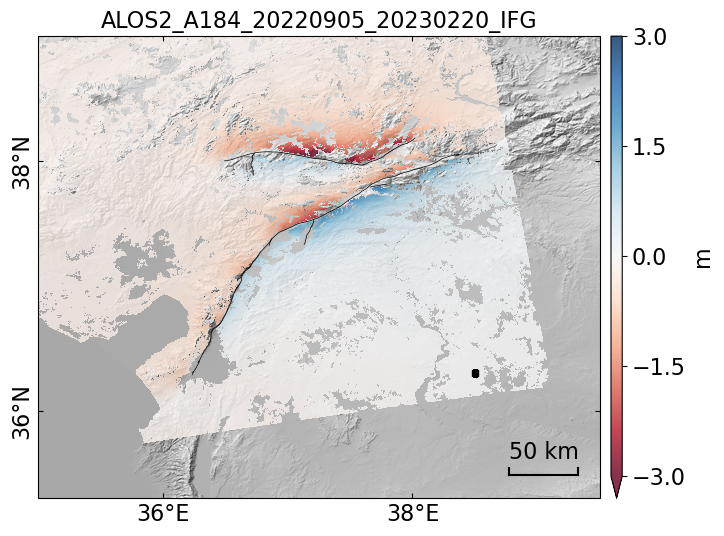

--------------------------------------------------2/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce .float file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/ALOS2_A184_20220905_20230220_MAI/mai_msk.geo in float32 format
file size in y/x: (4440, 5400)
num of datasets in file mai_msk.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 5400, 4440)
subset coverage in y/x: (0, 0, 5400, 4440)
data   coverage in lat/lon: (34.999583333333334, 39.000416666666666, 39.499583333333334, 35.30041666666666)
subset coverage in lat/lon: (34.999583333333334, 39.000416666666666, 39.499583333333334, 35.30041666666666)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: ALOS2_A184_20220905_20230220_MAI
figure size : [9.12, 6.00]
reading data ...
Un-scalable display un

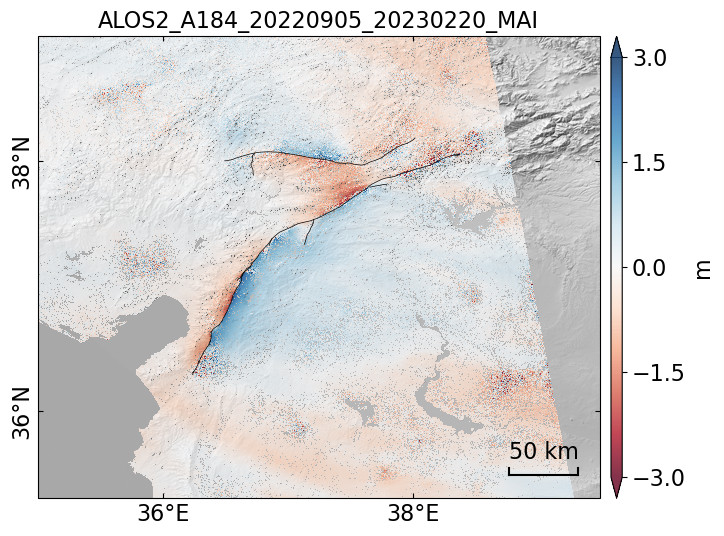

--------------------------------------------------3/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce .unw file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/ALOS2_D077_20220916_20230217_IFG/geo_filt_msk_ERA5_SET.unw in float32 format
file size in y/x: (4440, 5400)
input dataset: "['phase']"
num of datasets in file geo_filt_msk_ERA5_SET.unw: 2
datasets to exclude (0):
[]
datasets to display (1):
['phase']
data   coverage in y/x: (0, 0, 5400, 4440)
subset coverage in y/x: (0, 0, 5400, 4440)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: ALOS2_D077_20220916_20230217_IFG
figure size : [9.12, 6.00]
reading data ...
Apply math operation: reverse
data    range: [-2.3797

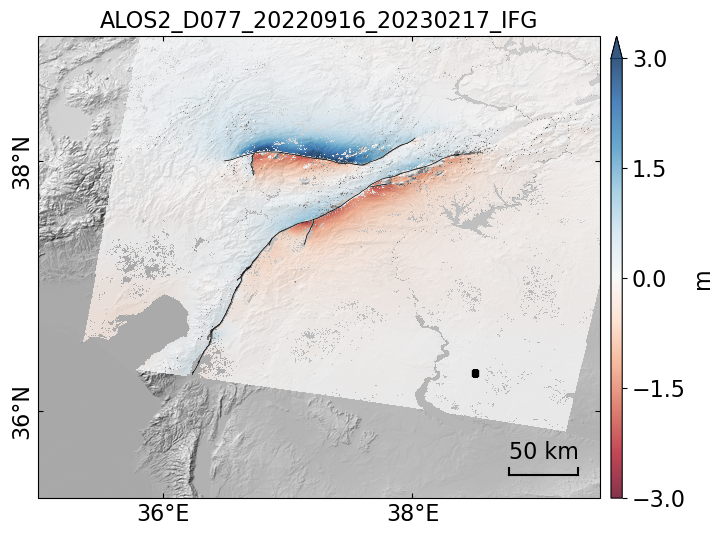

--------------------------------------------------4/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce .float file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/ALOS2_D077_20220916_20230217_MAI/mai_msk.geo in float32 format
file size in y/x: (4440, 5400)
num of datasets in file mai_msk.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 5400, 4440)
subset coverage in y/x: (0, 0, 5400, 4440)
data   coverage in lat/lon: (34.999583333333334, 39.000416666666666, 39.499583333333334, 35.30041666666666)
subset coverage in lat/lon: (34.999583333333334, 39.000416666666666, 39.499583333333334, 35.30041666666666)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: ALOS2_D077_20220916_20230217_MAI
figure size : [9.12, 6.00]
reading data ...
Un-scalable display un

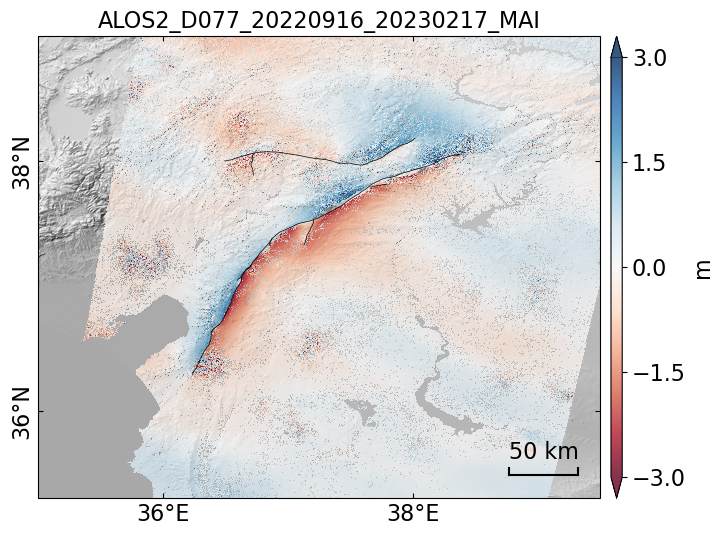

--------------------------------------------------5/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce .unw file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/LT1_D068_20220411_20230210_IFG/geo_filt_fine_cor_msk_ERA5_SET.unw in float32 format
file size in y/x: (4440, 5400)
input dataset: "['phase']"
num of datasets in file geo_filt_fine_cor_msk_ERA5_SET.unw: 2
datasets to exclude (0):
[]
datasets to display (1):
['phase']
data   coverage in y/x: (0, 0, 5400, 4440)
subset coverage in y/x: (0, 0, 5400, 4440)
data   coverage in lat/lon: (35.00000000112, 38.99999998502, 39.50000003712, 35.29999995542)
subset coverage in lat/lon: (35.00000000112, 38.99999998502, 39.50000003712, 35.29999995542)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: LT1_D068_20220411_20230210_IFG
figure size : [9.12, 6.00]
re

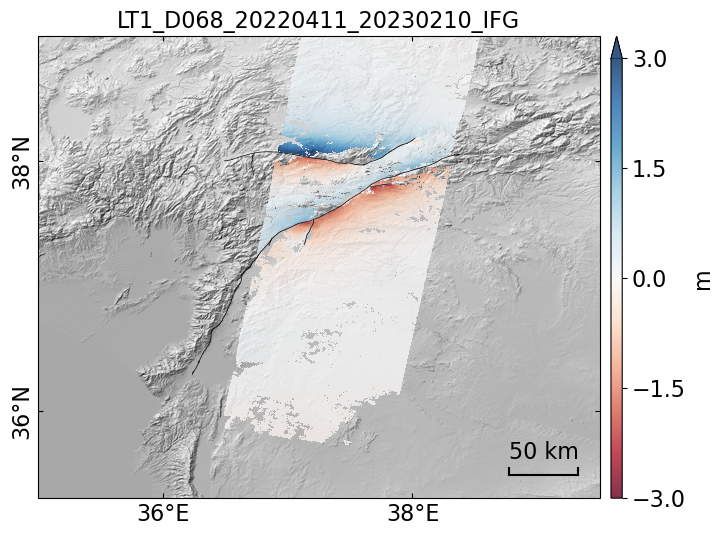

--------------------------------------------------6/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce .bil file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/S1_A014_20230128_20230209_OFF_AZ/offAz.geo in float32 format
file size in y/x: (1332, 1620)
num of datasets in file offAz.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 1620, 1332)
subset coverage in y/x: (0, 0, 1620, 1332)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: S1_A014_20230128_20230209_OFF_AZ
figure size : [9.12, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of -10000.0
data    range: [-4.834112, 4.834112] m
display range: [-3.0, 3.0] m
reading DEM: demLat_N35_N42_Lon_E034_E041_90m.h5 ...
display

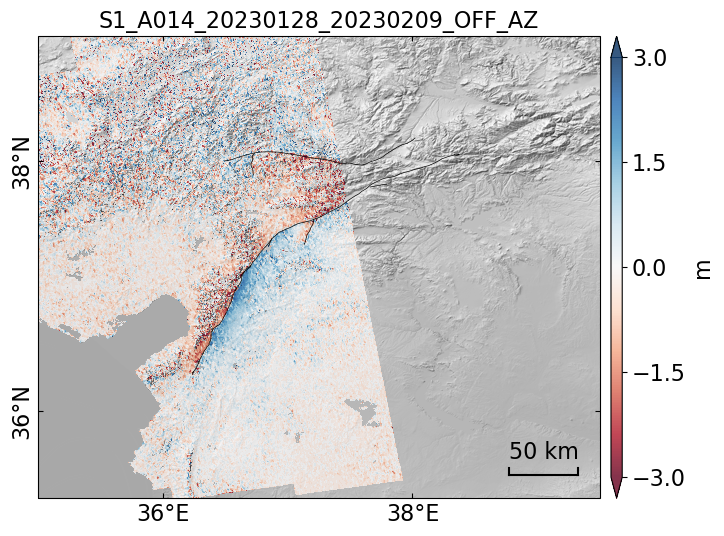

--------------------------------------------------7/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce displacement file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/S1_A014_20230128_20230209_OFF_RG/offRg_ERA5_SET.geo in float32 format
file size in y/x: (1332, 1620)
num of datasets in file offRg_ERA5_SET.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 1620, 1332)
subset coverage in y/x: (0, 0, 1620, 1332)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: S1_A014_20230128_20230209_OFF_RG
figure size : [9.12, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of -10000.0
data    range: [-4.8158855, 5.086593] m
display range: [-3.0, 3.0] m
reading DEM: demLat_N35_N42_Lon_E

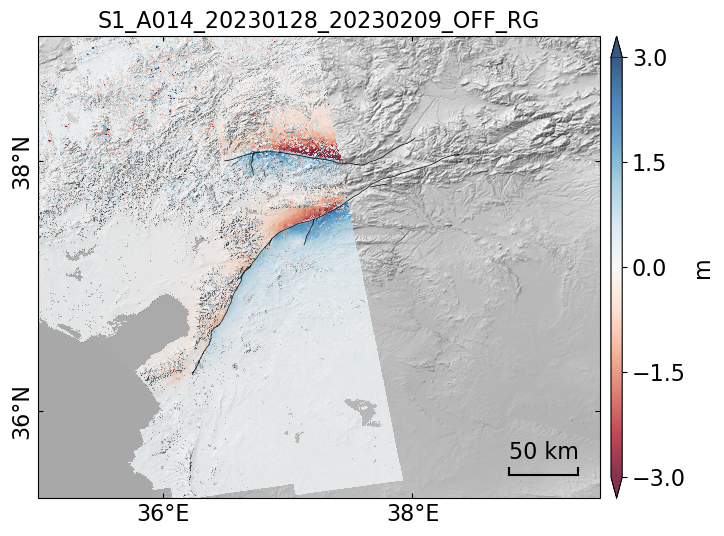

--------------------------------------------------8/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce filt_dense_offsets file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/S1_A116_20230204_20230228_OFF_AZ/offAz.geo in float32 format
file size in y/x: (1332, 1620)
num of datasets in file offAz.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 1620, 1332)
subset coverage in y/x: (0, 0, 1620, 1332)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: S1_A116_20230204_20230228_OFF_AZ
figure size : [9.12, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of -10000.0
data    range: [-4.8340797, 4.8340797] m
display range: [-3.0, 3.0] m
reading DEM: demLat_N35_N42_Lon_E034_E041_90

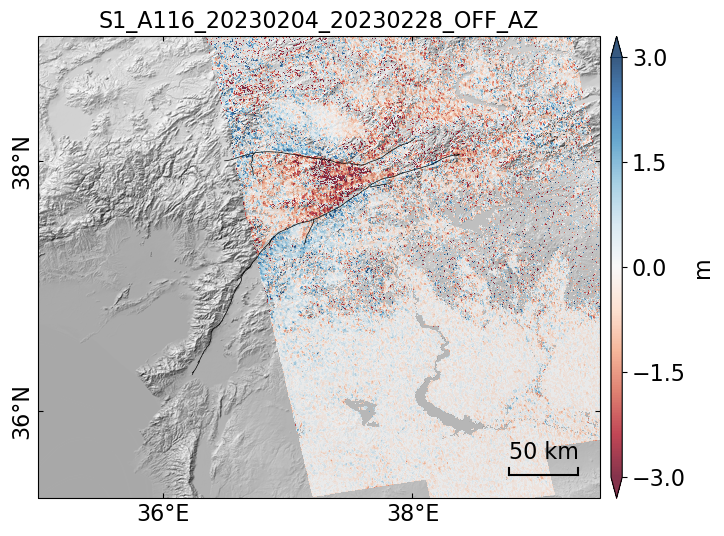

--------------------------------------------------9/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce displacement file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/S1_A116_20230204_20230228_OFF_RG/offRg_ERA5_SET.geo in float32 format
file size in y/x: (1332, 1620)
num of datasets in file offRg_ERA5_SET.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 1620, 1332)
subset coverage in y/x: (0, 0, 1620, 1332)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: S1_A116_20230204_20230228_OFF_RG
figure size : [9.12, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of -10000.0
data    range: [-5.1265883, 4.8799906] m
display range: [-3.0, 3.0] m
reading DEM: demLat_N35_N42_Lon_

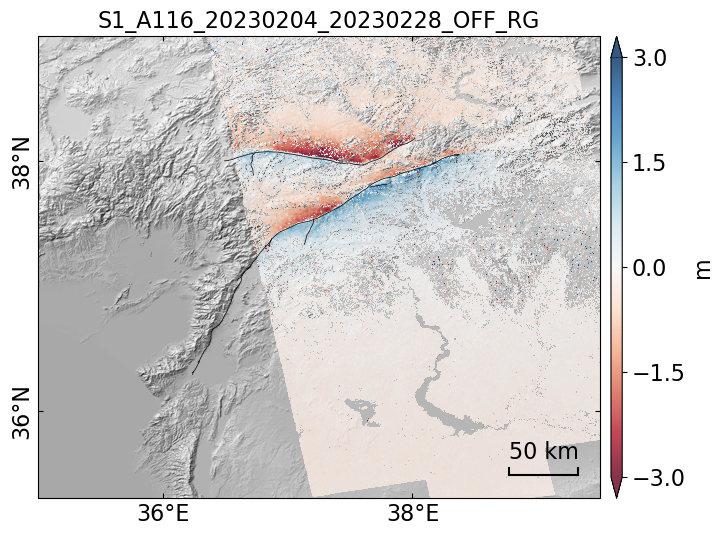

--------------------------------------------------10/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce .bil file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/S1_D021_20230129_20230210_OFF_AZ/offAz.geo in float32 format
file size in y/x: (1332, 1620)
num of datasets in file offAz.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 1620, 1332)
subset coverage in y/x: (0, 0, 1620, 1332)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: S1_D021_20230129_20230210_OFF_AZ
figure size : [9.12, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of -10000.0
data    range: [-4.83313, 4.83313] m
display range: [-3.0, 3.0] m
reading DEM: demLat_N35_N42_Lon_E034_E041_90m.h5 ...
display 

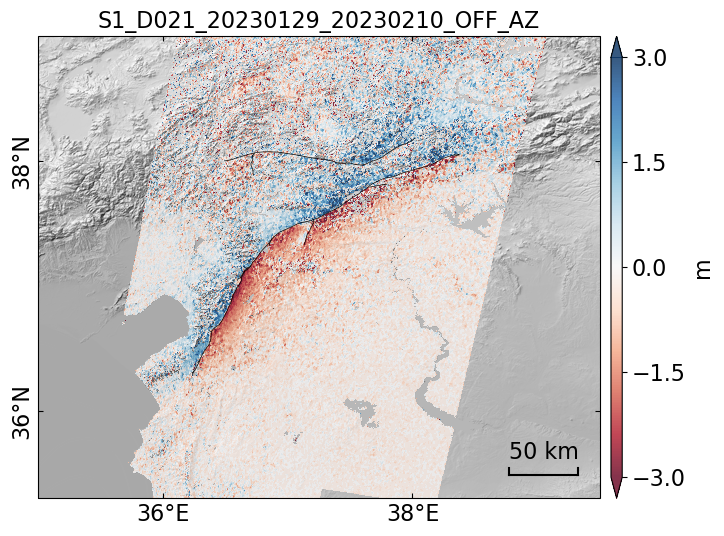

--------------------------------------------------11/11
run view.py in MintPy version 1.5.1.post47, date 2023-06-21
input file is isce displacement file: /Users/yunjunz/data/archives/2023TurkeyEQ/data/S1_D021_20230129_20230210_OFF_RG/offRg_ERA5_SET.geo in float32 format
file size in y/x: (1332, 1620)
num of datasets in file offRg_ERA5_SET.geo: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 1620, 1332)
subset coverage in y/x: (0, 0, 1620, 1332)
data   coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
subset coverage in lat/lon: (35.0, 39.0, 39.5000036, 35.29999704)
------------------------------------------------------------------------
colormap: RdBu
initiate cartopy map projection: PlateCarree
figure title: S1_D021_20230129_20230210_OFF_RG
figure size : [9.12, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of -10000.0
data    range: [-4.991801, 4.943524] m
display range: [-3.0, 3.0] m
reading DEM: demLat_N35_N42_Lon_E

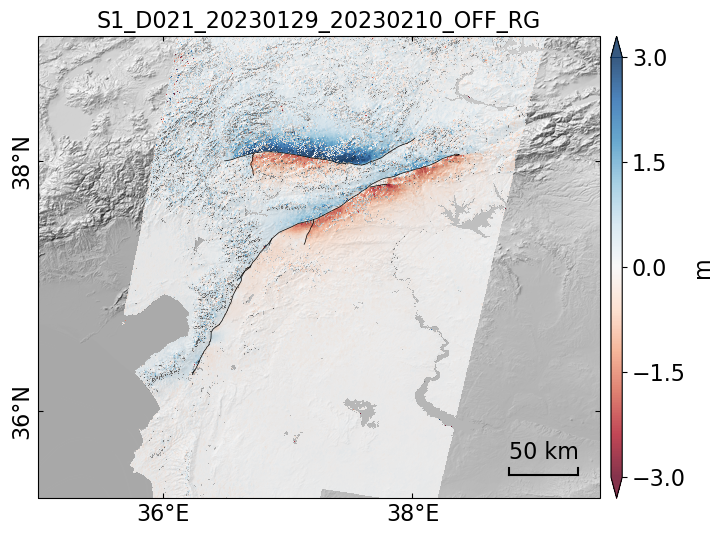

In [3]:
for i, fname in enumerate(fnames):
    print('-'*50 + f'{i+1}/{len(fnames)}')
    fname = glob.glob(os.path.join(work_dir, fname))[0]
    dname = os.path.basename(os.path.dirname(fname))
    out_file = os.path.join(work_dir, f'pic/{dname}.png')

    # compose view.py cmd
    cmd = f'{fname} phase --math reverse ' if fname.endswith('.unw') else f'{fname} '
    cmd += f'--dem {dem_file} --dem-nocontour --shade-exag 0.05 --faultline {flt_file} '
    cmd += f'-c RdBu -v -3 3 -u m --lalo-label --lalo-step 2 --ylabel-rot 90 --cbar-nbins 5 '
    cmd += f'--scalebar 0.12 0.90 0.05 --title {dname} --ref-size 4 '
    cmd += f'-o {out_file} '
    view.main(cmd.split())